In [15]:
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split

# Random generator
rng = np.random.default_rng()

# Generate full dataset
data = rng.uniform(size=(500, 10))
label = rng.integers(low=0, high=2, size=(500, ))

# Split into train and validation
X_train, X_val, y_train, y_val = train_test_split(data, label, test_size=0.2, random_state=42)

In [16]:
# Create LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

# Train model
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'verbose': -1
}

bst = lgb.train(params, 
                train_data, 
                valid_sets=[train_data, valid_data], 
                valid_names=['train', 'valid'],
                num_boost_round=100)

In [17]:
bst.save_model('lightgbm_out/model_2.txt', num_iteration=bst.best_iteration)

In [18]:
# Predict probabilities
y_pred = bst.predict(X_val)

# Threshold at 0.5 to get predicted class
y_pred_labels = (y_pred > 0.5).astype(int)

# Example output
print("First 10 probabilities:", y_pred[:10])
print("First 10 predicted labels:", y_pred_labels[:10])
print("First 10 true labels:", y_val[:10])

First 10 probabilities: [0.79011494 0.95591661 0.06051964 0.56769793 0.82798641 0.04733866
 0.16917339 0.59698712 0.74243372 0.65314874]
First 10 predicted labels: [1 1 0 1 1 0 0 1 1 1]
First 10 true labels: [1 0 0 0 1 0 0 0 1 0]


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict probabilities
y_pred = bst.predict(X_val)

# Convert probabilities to binary predictions
y_pred_labels = (y_pred > 0.5).astype(int)

# Metrics
accuracy = accuracy_score(y_val, y_pred_labels)
precision = precision_score(y_val, y_pred_labels)
recall = recall_score(y_val, y_pred_labels)
f1 = f1_score(y_val, y_pred_labels)

# Display
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 score:  {f1:.4f}")

Accuracy:  0.5400
Precision: 0.5800
Recall:    0.5370
F1 score:  0.5577


Unable to revert mtime: /Library/Fonts
Matplotlib is building the font cache; this may take a moment.


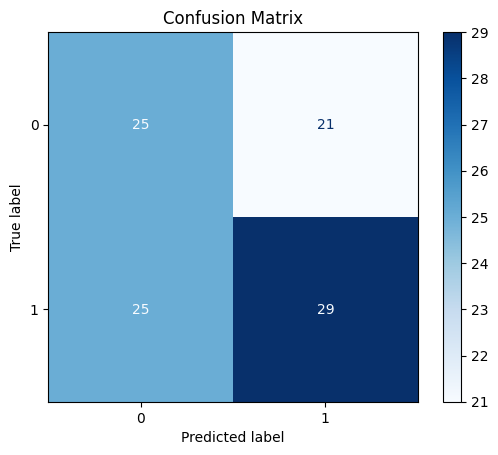

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred_labels)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
